#### This notebook analyses the heat content and SST responses in the abrupt experiments.

In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit
from xhistogram.xarray import histogram

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client(n_workers=8)
display(client)

Client Scheduler: tcp://127.0.0.1:40119 Dashboard: /proxy/42151/status,Cluster Workers: 8 Cores: 8 Memory: 128.85 GB


In [3]:
### Generate new session

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'
session = cc.database.create_session(db)

cc.querying.get_experiments(session)

,experiment,ncfiles
0,1deg_jra55_ryf_cont,169527
1,1deg_jra55_ryf_rcp45cool_spinup500,42426
2,1deg_jra55_ryf_rcp45warm_spinup500,47726
3,1deg_jra55_ryf_rcp45cool_spinup400,21206
4,1deg_jra55_ryf_rcp45warm_spinup400,21206
5,1deg_jra55_ryf_rcp45cool_x2_spinup500,42426
6,1deg_jra55_ryf_rcp45warm_x2_spinup500,42426
7,1deg_jra55_ryf_rcp45warm_x1_spinup500,42426
8,1deg_jra55_ryf_rcp45cool_x1_spinup500,42426
9,1deg_jra55_ryf_warm_0sat_8dwlw_spinup500,21206


In [4]:
yr_beg = '2400-01-16'

expt = '1deg_jra55_ryf_cont'
var = 'temp'
frequency = '1 monthly'
temp_cont = cc.querying.getvar(expt, var, session, start_time = yr_beg).chunk(chunks='auto') 

In [5]:
expt = '1deg_jra55_ryf_RCPcool_humid_x1'
var = 'temp'
frequency = '1 monthly'
temp_RCPcool_humid_x1 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto') 

In [6]:
expt = '1deg_jra55_ryf_RCPcool_humid_x2'
var = 'temp'
frequency = '1 monthly'
temp_RCPcool_humid_x2 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto') 

In [5]:
expt = '1deg_jra55_ryf_RCPwarm_humid_x1'
var = 'temp'
frequency = '1 monthly'
temp_RCPwarm_humid_x1 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto') 

In [8]:
expt = '1deg_jra55_ryf_RCPwarm_humid_x2'
var = 'temp'
frequency = '1 monthly'
temp_RCPwarm_humid_x2 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto') 

In [9]:
expt = '1deg_jra55_ryf_rcp45cool_x1_spinup500'
var = 'temp'
frequency = '1 monthly'
temp_coolx1 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto') 

In [10]:
expt = '1deg_jra55_ryf_rcp45cool_x2_spinup500'
var = 'temp'
frequency = '1 monthly'
temp_coolx2 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto') 

In [6]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500'
var = 'temp'
frequency = '1 monthly'
temp_warmx1 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto')

In [12]:
expt = '1deg_jra55_ryf_rcp45warm_x2_spinup500'
var = 'temp'
frequency = '1 monthly'
temp_warmx2 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto')

In [7]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500_test'
var = 'temp'
frequency = '1 monthly'
temp_warmx1_test = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto')

In [1]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500_test1'
var = 'temp'
frequency = '1 monthly'
temp_warmx1_test1 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto')

NameError: name 'cc' is not defined

### Calculate global average temperature

In [14]:
expt = '1deg_jra55_ryf_cont'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session, start_time = yr_beg) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_cont_ave = (temp_cont * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [14]:
expt = '1deg_jra55_ryf_RCPcool_humid_x1'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_RCPcool_humid_x1_ave = (temp_RCPcool_humid_x1 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [15]:
expt = '1deg_jra55_ryf_RCPcool_humid_x2'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_RCPcool_humid_x2_ave = (temp_RCPcool_humid_x2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [15]:
expt = '1deg_jra55_ryf_RCPwarm_humid_x1'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_RCPwarm_humid_x1_ave = (temp_RCPwarm_humid_x1 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [17]:
expt = '1deg_jra55_ryf_RCPwarm_humid_x2'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_RCPwarm_humid_x2_ave = (temp_RCPwarm_humid_x2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [18]:
expt = '1deg_jra55_ryf_rcp45cool_x1_spinup500'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_coolx1_ave = (temp_coolx1 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [19]:
expt = '1deg_jra55_ryf_rcp45cool_x2_spinup500'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_coolx2_ave = (temp_coolx2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [16]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_warmx1_ave = (temp_warmx1 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [21]:
expt = '1deg_jra55_ryf_rcp45warm_x2_spinup500'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_warmx2_ave = (temp_warmx2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [17]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500_test'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_warmx1_test_ave = (temp_warmx1_test * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [17]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500_test1'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_warmx1_test1_ave = (temp_warmx1_test1 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [28]:
expt = '1deg_jra55_ryf_warm_1.5sat_0dwlw_spinup500'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_warm_Tonly_ave = (temp_warm_Tonly * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [29]:
expt = '1deg_jra55_ryf_warm_0sat_8dwlw_spinup500'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_warm_RADonly_ave = (temp_warm_RADonly * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [19]:
temp_cont_ave = temp_cont_ave.groupby('time.year').mean(dim='time').load()
temp_warmx1_test_ave = temp_warmx1_test_ave.groupby('time.year').mean(dim='time').load()
temp_warmx1_test1_ave = temp_warmx1_test1_ave.groupby('time.year').mean(dim='time').load()

In [22]:
temp_cont_ave = temp_cont_ave.groupby('time.year').mean(dim='time').load()

temp_RCPcool_humid_x1_ave = temp_RCPcool_humid_x1_ave.groupby('time.year').mean(dim='time').load()
temp_RCPcool_humid_x2_ave = temp_RCPcool_humid_x2_ave.groupby('time.year').mean(dim='time').load()
temp_RCPwarm_humid_x1_ave = temp_RCPwarm_humid_x1_ave.groupby('time.year').mean(dim='time').load()
temp_RCPwarm_humid_x2_ave = temp_RCPwarm_humid_x2_ave.groupby('time.year').mean(dim='time').load()

temp_coolx1_ave = temp_coolx1_ave.groupby('time.year').mean(dim='time').load()
temp_coolx2_ave = temp_coolx2_ave.groupby('time.year').mean(dim='time').load()
temp_warmx1_ave = temp_warmx1_ave.groupby('time.year').mean(dim='time').load()
temp_warmx2_ave = temp_warmx2_ave.groupby('time.year').mean(dim='time').load()

In [40]:
# Trend in control heat content: fit a cubic

def cubic(t, a, b, c, d):
    return a * t**3 + b * t**2 + c * t + d

t = temp_cont_ave['year']
popt, pcov = curve_fit(cubic, t, temp_cont_ave)
temp_ave_trend = cubic(t, *popt)

plt.figure(figsize=(13,9))
(temp_ave_trend - 273.15).plot(color='r', linestyle='--', label='Fit')
(temp_cont_ave - 273.15).plot(color='b', label='Data')
plt.legend()
plt.title('Drift in control global average temperature', fontsize=13)
plt.ylabel('Temperature (deg C)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid()
#plt.savefig('drift.jpg')

plt.figure(figsize=(13,9))
(temp_cool_ave-273.15).plot(label='cool', color='b')
(temp_warm_ave-273.15).plot(label='warm', color='r')
(temp_cont_ave-273.15).plot(label='cont', color='g')

KeyError: 'year'

#### Plotting globally averaged temperature over time

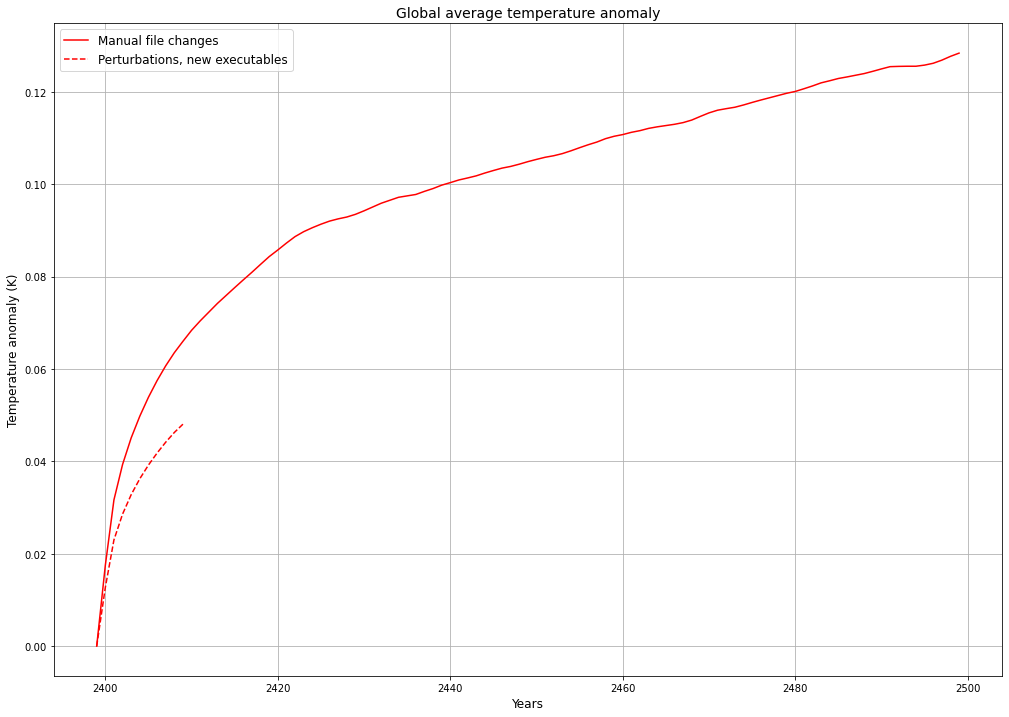

In [25]:
plt.figure(figsize = (17,12))

zero = xr.DataArray(data=[0], dims='year', coords={"year": [2399]})

warmx1_test_anom_plot = xr.concat([zero, temp_warmx1_test_ave - temp_cont_ave], dim='year')
warmx1_test1_anom_plot = xr.concat([zero, temp_warmx1_test1_ave - temp_cont_ave], dim='year')

warmx1_test1_anom_plot.plot(label='Manual file changes', color = 'r')
warmx1_test_anom_plot.plot(label='Perturbations', color = 'r', linestyle = '--')

plt.title('Global average temperature anomaly', fontsize=14)
plt.ylabel('Temperature anomaly (K)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('ave_temp_compare.jpg')

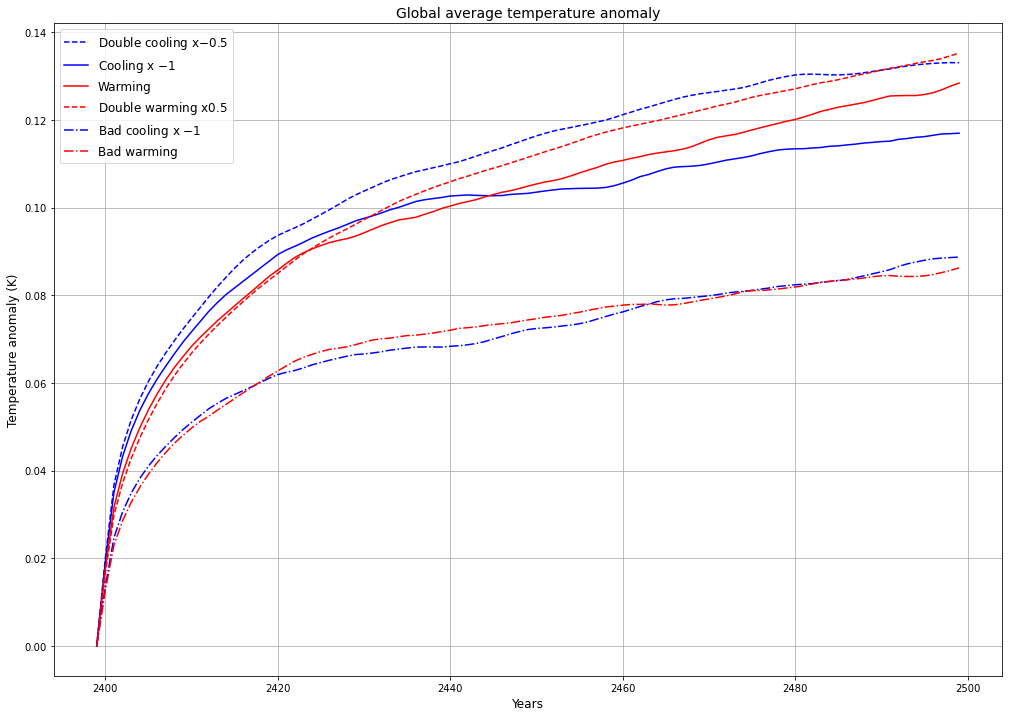

In [48]:
plt.figure(figsize = (17,12))

zero = xr.DataArray(data=[0], dims='year', coords={"year": [2399]})

RCPcool_humid_x1_anom_plot = xr.concat([zero, temp_RCPcool_humid_x1_ave - temp_cont_ave], dim='year')
RCPcool_humid_x2_anom_plot = xr.concat([zero, temp_RCPcool_humid_x2_ave - temp_cont_ave], dim='year')
RCPwarm_humid_x1_anom_plot = xr.concat([zero, temp_RCPwarm_humid_x1_ave - temp_cont_ave], dim='year')
RCPwarm_humid_x2_anom_plot = xr.concat([zero, temp_RCPwarm_humid_x2_ave - temp_cont_ave], dim='year')

coolx1_anom_plot = xr.concat([zero, temp_coolx1_ave - temp_cont_ave], dim='year')
coolx2_anom_plot = xr.concat([zero, temp_coolx2_ave - temp_cont_ave], dim='year')
warmx1_anom_plot = xr.concat([zero, temp_warmx1_ave - temp_cont_ave], dim='year')
warmx2_anom_plot = xr.concat([zero, temp_warmx2_ave - temp_cont_ave], dim='year')

(- 0.5 * RCPcool_humid_x2_anom_plot).plot(label='Double cooling x$-0.5$', color = 'b', linestyle = '--')
(- 1 * RCPcool_humid_x1_anom_plot).plot(label='Cooling x $-1$', color = 'b')
RCPwarm_humid_x1_anom_plot.plot(label='Warming', color = 'r')
(0.5 * RCPwarm_humid_x2_anom_plot).plot(label='Double warming x$0.5$', color = 'r', linestyle = '--')

# (-0.5 * coolx2_anom_plot).plot(label='Double cooling x$-0.5$', color = 'b')
(- 1 * coolx1_anom_plot).plot(label='Bad cooling x $-1$', color = 'b', linestyle = '-.')
(warmx1_anom_plot).plot(label='Bad warming', color = 'r', linestyle = '-.')
# (0.5 * warmx2_anom_plot).plot(label='Double warming x$0.5$', color = 'r')

plt.title('Global average temperature anomaly', fontsize=14)
plt.ylabel('Temperature anomaly (K)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig('global_average_temp.jpg')

### Calculate SST

In [ ]:
# SST
yr_beg = '2401-01-01' # I'm not sure why but this year makes the SST start at 2400-01-02, which I want.
expt = '1deg_jra55_ryf_cont'
var = 'temp_surface_ave'
SST_cont = cc.querying.getvar(expt, var, session, start_time = yr_beg)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_RCPcool_humid_x1'
var = 'temp_surface_ave'
SST_RCPcool_humid_x1 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_RCPcool_humid_x2'
var = 'temp_surface_ave'
SST_RCPcool_humid_x2 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_RCPwarm_humid_x1'
var = 'temp_surface_ave'
SST_RCPwarm_humid_x1 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_RCPwarm_humid_x2'
var = 'temp_surface_ave'
SST_RCPwarm_humid_x2 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_rcp45cool_x1_spinup500'
var = 'temp_surface_ave'
SST_coolx1 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500'
var = 'temp_surface_ave'
SST_warmx1 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_rcp45cool_x2_spinup500'
var = 'temp_surface_ave'
SST_coolx2 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_rcp45warm_x2_spinup500'
var = 'temp_surface_ave'
SST_warmx2 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500_test'
var = 'temp_surface_ave'
SST_warmx1_test = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500_test1'
var = 'temp_surface_ave'
SST_warmx1_test1 = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [56]:
expt = '1deg_jra55_ryf_warm_1.5sat_0dwlw_spinup500'
var = 'temp_surface_ave'
SST_warm_Tonly = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [57]:
expt = '1deg_jra55_ryf_warm_0sat_8dwlw_spinup500'
var = 'temp_surface_ave'
SST_warm_RADonly = cc.querying.getvar(expt, var, session)[:-1].groupby('time.year').mean('time')

In [ ]:
SST_cont = SST_cont.load()
SST_warmx1_test = SST_warmx1_test.load()
SST_warmx1_test1 = SST_warmx1_test1.load()

In [ ]:
SST_cont = SST_cont.load()
SST_RCPcool_humid_x1 = SST_RCPcool_humid_x1.load()
SST_RCPcool_humid_x2 = SST_RCPcool_humid_x2.load()
SST_RCPwarm_humid_x1 = SST_RCPwarm_humid_x1.load()
SST_RCPwarm_humid_x2 = SST_RCPwarm_humid_x2.load()

SST_coolx1 = SST_coolx1.load()
SST_coolx2 = SST_coolx2.load()

In [ ]:
plt.figure(figsize = (17,12))

zero = xr.DataArray(data=[0], dims='year', coords={"year": [2399]})

warmx1_test_anom_plot = xr.concat([zero, SST_warmx1_test[:,0] - SST_cont[:,0]], dim='year')
warmx1_test1_anom_plot = xr.concat([zero, SST_warmx1_test1[:,0] - SST_cont[:,0]], dim='year')

warmx1_test1_anom_plot.plot(label='Manual file changes', color = 'r')
warmx1_test_anom_plot.plot(label='Perturbations', color = 'r', linestyle = '--')

plt.title('SST anomaly', fontsize=13)
plt.ylabel('Temperature anomaly (K)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('SST_compare.jpg')

In [ ]:
plt.figure(figsize = (17,12))

zero = xr.DataArray(data=[0], dims='year', coords={"year": [2399]})

RCPcool_humid_x1_anom_plot = xr.concat([zero, SST_RCPcool_humid_x1[:,0] - SST_cont[:,0]], dim='year')
RCPcool_humid_x2_anom_plot = xr.concat([zero, SST_RCPcool_humid_x2[:,0] - SST_cont[:,0]], dim='year')
RCPwarm_humid_x1_anom_plot = xr.concat([zero, SST_RCPwarm_humid_x1[:,0] - SST_cont[:,0]], dim='year')
RCPwarm_humid_x2_anom_plot = xr.concat([zero, SST_RCPwarm_humid_x2[:,0] - SST_cont[:,0]], dim='year')

(- 1 * RCPcool_humid_x1_anom_plot).plot(label='Cooling x$-1$', color = 'b')
(- 0.5 * RCPcool_humid_x2_anom_plot).plot(label='Double cooling x$-0.5$', color = 'b', linestyle = '--')
RCPwarm_humid_x1_anom_plot.plot(label='Warming', color = 'r')
(0.5 * RCPwarm_humid_x2_anom_plot).plot(label='Double warming x$0.5$', color = 'r', linestyle = '--')

plt.title('SST anomaly', fontsize=13)
plt.ylabel('Temperature anomaly (K)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig('SST_good_perturbation.jpg')

### Calculate total ocean heat content from conservative temperature

In [8]:
rho_0 = 1030 #kg/m^3
c_p = 3992 #J/kg/K

In [9]:
expt = '1deg_jra55_ryf_cont'
dzt = cc.querying.getvar(expt, 'dzt', session, start_time = yr_beg)
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) #Volume of cells
heat_cont = rho_0 * c_p * (temp_cont * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean'])

In [35]:
# expt = '1deg_jra55_ryf_rcp45cool_spinup500'
# dzt = cc.querying.getvar(expt, 'dzt', session) #thickness of cells
# area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
# dVol = (dzt * area_t) #Volume of cells
# heat_cool = rho_0 * c_p * (temp_cool * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean'])

In [36]:
# expt = '1deg_jra55_ryf_rcp45warm_spinup500'
# dzt = cc.querying.getvar(expt, 'dzt', session) #thickness of cells
# area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
# dVol = (dzt * area_t) #Volume of cells
# heat_warm = rho_0 * c_p * (temp_warm * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean'])

In [26]:
expt = '1deg_jra55_ryf_rcp45cool_x1_spinup500'
dzt = cc.querying.getvar(expt, 'dzt', session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) #Volume of cells
heat_coolx1 = rho_0 * c_p * (temp_coolx1 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean'])

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/sqlalchemy/engine/default.py", line 559, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 22783579019072 and this is thread id 22779092530944.
Exception closing connection <sqlite3.Connection object at 0x14b816fef3f0>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/sqlalchemy/po

In [27]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500'
dzt = cc.querying.getvar(expt, 'dzt', session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) #Volume of cells
heat_warmx1 = rho_0 * c_p * (temp_warmx1 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean'])

In [10]:
expt = '1deg_jra55_ryf_rcp45cool_x2_spinup500'
dzt = cc.querying.getvar(expt, 'dzt', session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) #Volume of cells
heat_coolx2 = rho_0 * c_p * (temp_coolx2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean'])

In [11]:
expt = '1deg_jra55_ryf_rcp45warm_x2_spinup500'
dzt = cc.querying.getvar(expt, 'dzt', session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) #Volume of cells
heat_warmx2 = rho_0 * c_p * (temp_warmx2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean'])

In [12]:
# Yearly average

heat_cont = heat_cont.groupby('time.year').mean(dim='time').load()
heat_coolx2 = heat_coolx2.groupby('time.year').mean(dim='time').load()
heat_warmx2 = heat_warmx2.groupby('time.year').mean(dim='time').load()

In [29]:
heat_coolx1 = heat_coolx1.groupby('time.year').mean(dim='time').load()
heat_warmx1 = heat_warmx1.groupby('time.year').mean(dim='time').load()

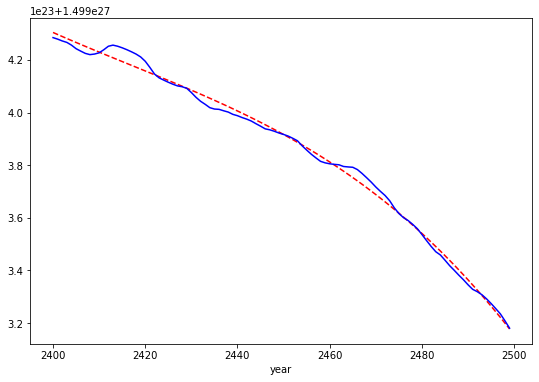

In [49]:
# Trend in control heat content: fit a cubic

def cubic(t, a, b, c, d):
    return a * t**3 + b * t**2 + c * t + d

t = heat_cont['year']
popt, pcov = curve_fit(cubic, t, heat_cont / 1e27)
heat_trend = cubic(t, *popt) * 1e27

plt.figure(figsize=(9,6))
(heat_trend).plot(color='r', linestyle='--')
heat_cont.plot(color='b')

#### Plotting ocean heat content over time

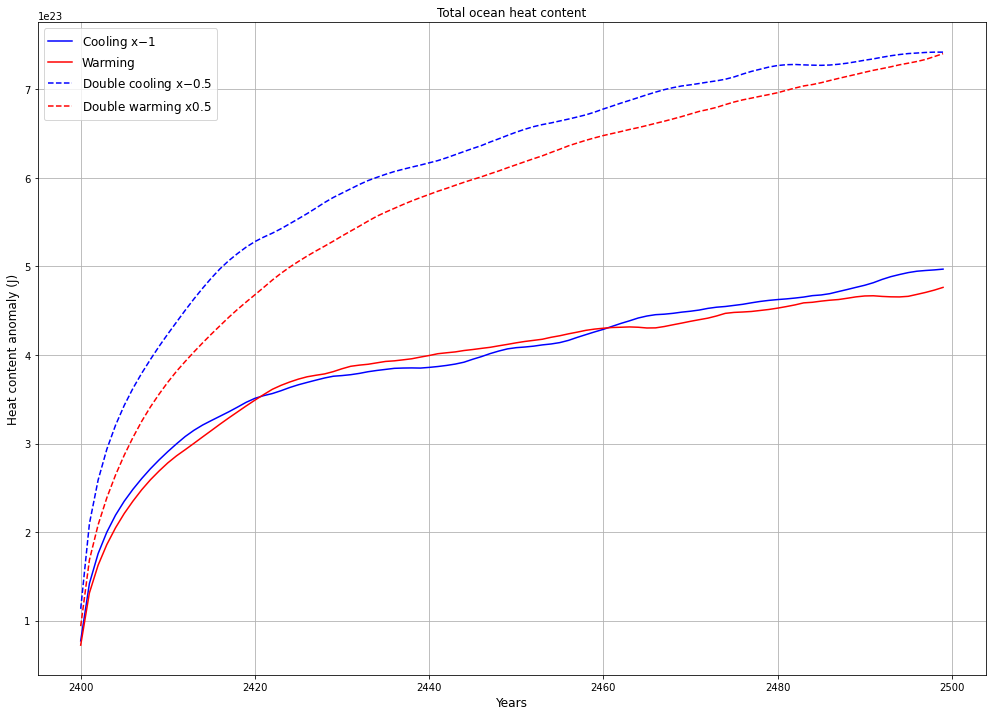

In [36]:
plt.figure(figsize = (17,12))

(-1 * (heat_coolx1 - heat_cont)).plot(label='Cooling x$-1$', color = 'b')
(heat_warmx1 - heat_cont).plot(label='Warming', color = 'r')
(-0.5 * (heat_coolx2 - heat_cont)).plot(label='Double cooling x$-0.5$', color = 'b', linestyle='--')
(0.5 * (heat_warmx2 - heat_cont)).plot(label='Double warming x$0.5$', color = 'r', linestyle='--')
plt.title('Total ocean heat content')
plt.ylabel('Heat content anomaly (J)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig('total_heat_content.jpg')

### Calculate vertically-integrated heat content from conservative temperature

In [83]:
expt = '1deg_jra55_ryf_cont'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session, start_time = yr_beg)
vertically_integrated_heat_cont = (rho_0 * c_p * temp_cont * dzt).sum('st_ocean').groupby('time.year').mean(dim='time')

In [84]:
expt = '1deg_jra55_ryf_rcp45cool_spinup500'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session)
vertically_integrated_heat_cool = (rho_0 * c_p * temp_cool * dzt).sum('st_ocean').groupby('time.year').mean(dim='time')

In [85]:
expt = '1deg_jra55_ryf_rcp45warm_spinup500'
var = 'dzt'
dzt = cc.querying.getvar(expt, var, session)
vertically_integrated_heat_warm = (rho_0 * c_p * temp_warm * dzt).sum('st_ocean').groupby('time.year').mean(dim='time')

In [86]:
vertically_integrated_heat_cont.load()
vertically_integrated_heat_cool.load()
vertically_integrated_heat_warm.load()

<xarray.DataArray (year: 100, yt_ocean: 300, xt_ocean: 360)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * year      (year) int64 2400 2401 2402 2403 2404 ... 2495 2496 2497 2498 2499